## K-Fold Cross-Validation and Hyperparameter Tuning using GridSearchCV
The Notebook offers an example solution for the third milestone of the Rain Prediction second project.

### Data

We are using the [Rainfall prediction dataset from Kaggle](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package) which cotains daily weather observations from numerous Austrailian weather stations.

### Importing Libraries

In [22]:
##importing libraries
import numpy as np  #for algebraic operations on arrays
import pandas as pd  #for data exploration and manipulation


##plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Reading, Cleaning and Fitting the Dataset
Refer to milestone 1 if you have forgotten why were doing the following steps!

In [23]:
#Read the data
X_train=pd.read_csv('data/X_train.csv')
X_test=pd.read_csv('data/X_test.csv')
y_train=pd.read_csv('data/y_train.csv')
y_test=pd.read_csv('data/y_test.csv')

In [24]:
#Clean the data
X_train=X_train.iloc[:,1:]
X_test=X_test.iloc[:,1:]
y_train=y_train["RainTomorrow"]
y_test=y_test["RainTomorrow"]

In [25]:
#Import the class
from sklearn.linear_model import LogisticRegression

#Instantiate the model class
logreg = LogisticRegression(solver='liblinear', random_state=0)

#Train the model
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

---
---

### K-Fold Cross Validation and Hyperparameter Tuning using GridSearchCV

It's possible to use all the available data to assess the quality of models and get more reliable validation results. We can simply perform validation multiple times.

First, we split the training dataset into a certain number of parts (say, three). Then we train a model on two parts and validate on the remaining one. We repeat this process three times, and at the end get three different scores. This is exactly the idea behind K-fold cross-validation.

![Image](https://drek4537l1klr.cloudfront.net/grigorev/v-6/Figures/04_38.png)

Usually, when working with machine learning models, we need to split our model into 3 sets (not 2, like done upto now), the training set, the validation set and the test set. The reason is because if we have just one single test set, we end up tuning our hyperparameters based on the metrics of the test set, and hence in a sense, our model is adapted to our test set lessening the reason for the test set in the first place - to test our model on data it has never seen. But because we are now splitting it into three parts, the training set may further get reduced, worsening the model. The solution is to use K-Fold Cross Validation on the test set, and reserve a part of the dataset for the final testing at the end. 

In [26]:
#Importing the required 
from sklearn.model_selection import cross_validate, KFold

#We are using KFold to split the dataset, but alternatively we could just specify integer values for cv
kf = KFold(5,shuffle=True,random_state=0)
cv_scores = cross_validate(logreg,X_train,y_train,cv=kf,scoring=['accuracy','roc_auc'])
cv_scores

{'fit_time': array([1.39679313, 1.43390441, 1.17910504, 1.35417247, 1.51000261]),
 'score_time': array([0.11235046, 0.10819411, 0.10589981, 0.10441613, 0.11729145]),
 'test_accuracy': array([0.84668806, 0.8481825 , 0.84734737, 0.84914949, 0.84395604]),
 'test_roc_auc': array([0.86967067, 0.87256227, 0.86974046, 0.86918609, 0.86681804])}

In [27]:
#Print the mean accuracy score and AUC score for all the splits

print('Mean accuracy score for the data: {0:0.4f}'.format(cv_scores['test_accuracy'].mean()))
print('Mean AUC score for the data: {0:0.4f}'.format(cv_scores['test_roc_auc'].mean()))

Mean accuracy score for the data: 0.8471
Mean AUC score for the data: 0.8696


We can now use this concept of Cross Validation to use **GridSearchCV** to find the best parameters for our Logistic Regression Model.

In [7]:
from sklearn.model_selection import GridSearchCV

#We are creating a dictionary of all the permutations of parameters we wish to try out for the model
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'solver' : ['liblinear','lbfgs','saga']}
#In the above grid, we will effectively be trying out 7*3 = 21 models

clf = GridSearchCV(LogisticRegression(),param_grid,cv=3,verbose=2)

#Fit the classifier to obtain the best model for our data. This may take some time!
clf.fit(X_train,y_train)

Fitting 3 folds for each of 21 candidates, totalling 63 fits
[CV] C=0.001, solver=liblinear .......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........................ C=0.001, solver=liblinear, total=   0.4s
[CV] C=0.001, solver=liblinear .......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] ........................ C=0.001, solver=liblinear, total=   0.4s
[CV] C=0.001, solver=liblinear .......................................
[CV] ........................ C=0.001, solver=liblinear, total=   0.4s
[CV] C=0.001, solver=lbfgs ...........................................
[CV] ............................ C=0.001, solver=lbfgs, total=   0.5s
[CV] C=0.001, solver=lbfgs ...........................................
[CV] ............................ C=0.001, solver=lbfgs, total=   0.5s
[CV] C=0.001, solver=lbfgs ...........................................
[CV] ............................ C=0.001, solver=lbfgs, total=   0.6s
[CV] C=0.001, solver=saga ............................................
[CV] ............................. C=0.001, solver=saga, total=   1.8s
[CV] C=0.001, solver=saga ............................................
[CV] ............................. C=0.001, solver=saga, total=   1.9s
[CV] C=0.001, solver=saga ............................................
[CV] .

[CV] ............................. C=1000, solver=lbfgs, total=   1.4s
[CV] C=1000, solver=saga .............................................
[CV] .............................. C=1000, solver=saga, total=   2.5s
[CV] C=1000, solver=saga .............................................
[CV] .............................. C=1000, solver=saga, total=   2.5s
[CV] C=1000, solver=saga .............................................
[CV] .............................. C=1000, solver=saga, total=   2.6s


[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:  2.1min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'solver': ['liblinear', 'lbfgs', 'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [8]:
#Let us check out the best parameters for our model
clf.best_estimator_

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
from sklearn.metrics import accuracy_score

#We now use the classifer with the best model to predict the labels for our test set and check its accuracy
y_pred_test_grid = clf.predict(X_test)
print('Accuracy score for test data: {0:0.4f}'.format(accuracy_score(y_test, y_pred_test_grid)))

Accuracy score for test data: 0.8489


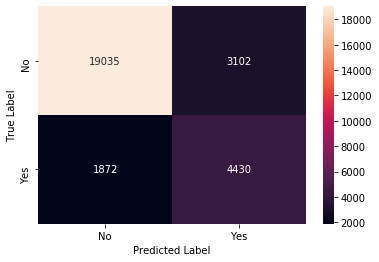

              precision    recall  f1-score   support

          No       0.91      0.86      0.88     22137
         Yes       0.59      0.70      0.64      6302

    accuracy                           0.83     28439
   macro avg       0.75      0.78      0.76     28439
weighted avg       0.84      0.83      0.83     28439



In [10]:
from sklearn.metrics import confusion_matrix, classification_report

#Let us now check the confusion matrix and classification report for this model and compare it to our initial one
#Set the threshold value manually
threshold = 0.3

BoolArray=clf.predict_proba(X_test)[:,1]>=threshold
predictions_grid=np.array(['Yes' if val==True else 'No' for val in BoolArray])

#Plotting the Confusion Matrix
cm = confusion_matrix(y_test,predictions_grid)
cmdf=pd.DataFrame(cm,index=["No","Yes"],columns=["No","Yes"])
fig,ax=plt.subplots(1,1)
sns.heatmap(cmdf,annot=True,fmt='d',ax=ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

#Printing the Classification Report
print(classification_report(y_test,predictions_grid))

### Conclusion

The final model after GridSearchCV is very comparable to the initial model we had. Accuracy is idenitical upto 4 decimal places but f1 score for "Yes" has increased while f1 score for "No" has decreased. Let's go ahead with the final model with a threshold value of 0.3.

### Save the Model

In [21]:
#Save the model

lr = clf.best_estimator_
lr.fit(X_train,y_train)

import joblib #Install the library if you do not have it or import it from sklearn.externals
joblib.dump(lr,'LogReg_Model.pkl')

['LogReg_Model.pkl']